# Coffe Sales Analysis

## Import library

In [29]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('Coffes Sales Dataset.csv',sep=';', encoding='latin1', decimal=',')
df.head()

,date,coffee_name,transaction_count,total_revenue
0,01/03/2024,Americano,1,28.9
1,01/03/2024,Americano with Milk,4,135.2
2,01/03/2024,Cocoa,1,38.7
3,01/03/2024,Hot Chocolate,3,116.1
4,01/03/2024,Latte,2,77.4


In [15]:
df.tail()

,date,coffee_name,transaction_count,total_revenue
482,29/06/2024,Latte,1,37.72
483,30/06/2024,Americano with Milk,1,32.82
484,30/06/2024,Espresso,1,23.02
485,30/06/2024,Hot Chocolate,1,37.72
486,30/06/2024,Latte,1,37.72


In [67]:
# Checking for missing values
df.isnull().sum()

date                 0
coffee_name          0
transaction_count    0
total_revenue        0
Day                  0
Month                0
Day of the week      0
Weekend              0
dtype: int64

In [68]:
# Check duplicates
df.duplicated().sum()

0

## Transform Data (Make new columns)

In [ ]:
# Convert the 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
# Make new column (Day name, Month name, Year)
df['Day'] = pd.to_datetime(df['date']).dt.day
df['Month'] = pd.to_datetime(df['date']).dt.month_name()
# Make new column (Day of the week)
df['Day of the week'] = pd.to_datetime(df['date']).dt.day_name()

In [26]:
df.head()

,date,coffee_name,transaction_count,total_revenue,Day,Month,Day of the week
0,2024-03-01,Americano,1,28.9,1,March,Friday
1,2024-03-01,Americano with Milk,4,135.2,1,March,Friday
2,2024-03-01,Cocoa,1,38.7,1,March,Friday
3,2024-03-01,Hot Chocolate,3,116.1,1,March,Friday
4,2024-03-01,Latte,2,77.4,1,March,Friday


## Exploratory Data

In [ ]:
df.describe(include=['number'])

,transaction_count,total_revenue,Day
count,487.000000,487.000000,487.00000
mean,1.839836,62.819179,15.98768
std,1.114354,39.673764,8.64336
min,1.000000,23.020000,1.00000
25%,1.000000,33.800000,9.00000
50%,1.000000,40.000000,16.00000
75%,2.000000,78.700000,23.00000
max,9.000000,339.480000,31.00000


In [58]:
# Sum of total revenue
total_revenue = df['total_revenue'].sum()
print(f'Total Revenue: {total_revenue}')

Total Revenue: 30592.940000000002


In [ ]:
# Average Sales Per day
average_sales_per_day = total_revenue / df['date'].nunique()
print(f'Average Sales Per Day: {average_sales_per_day}')

Average Sales Per Day: 257.08352941176474


In [60]:
# Sum of total transactions
total_transactions = df['transaction_count'].sum()
print(f'Total Transactions: {total_transactions}')

Total Transactions: 896


## Data Visualization

C:\Users\Irfan\AppData\Local\Temp\ipykernel_3248\538099727.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for index, row in df.groupby('Day of the week')['transaction_count'].sum().items():


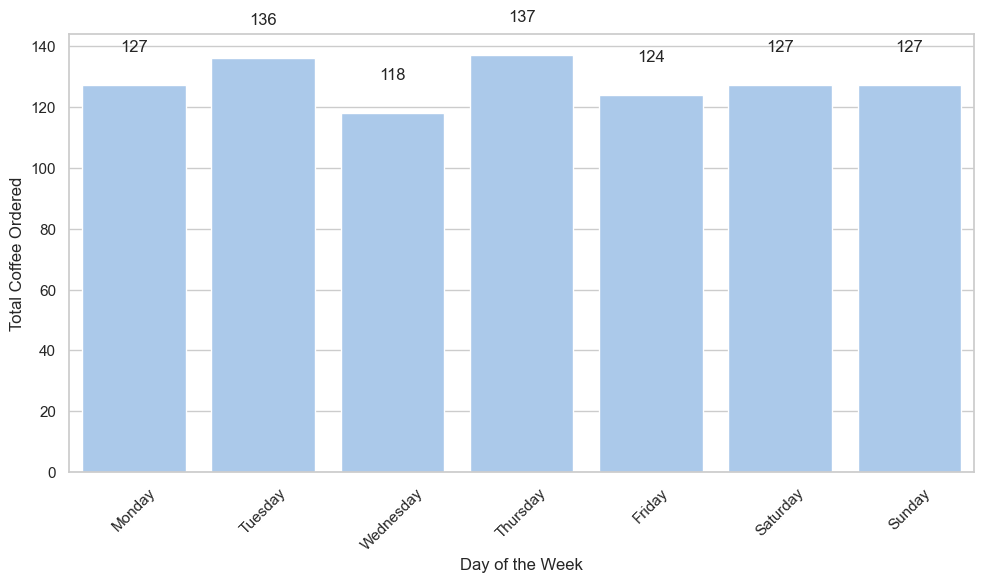

In [66]:
# Visualize total coffee ordered  by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of the week', y='transaction_count', data=df, estimator=np.sum, errorbar=None)
for index, row in df.groupby('Day of the week')['transaction_count'].sum().items():
    plt.text(index, row + 10, f'{row}', ha='center', va='bottom')
plt.xlabel('Day of the Week')
plt.ylabel('Total Coffee Ordered')
plt.xticks(rotation=45)
plt.tight_layout()

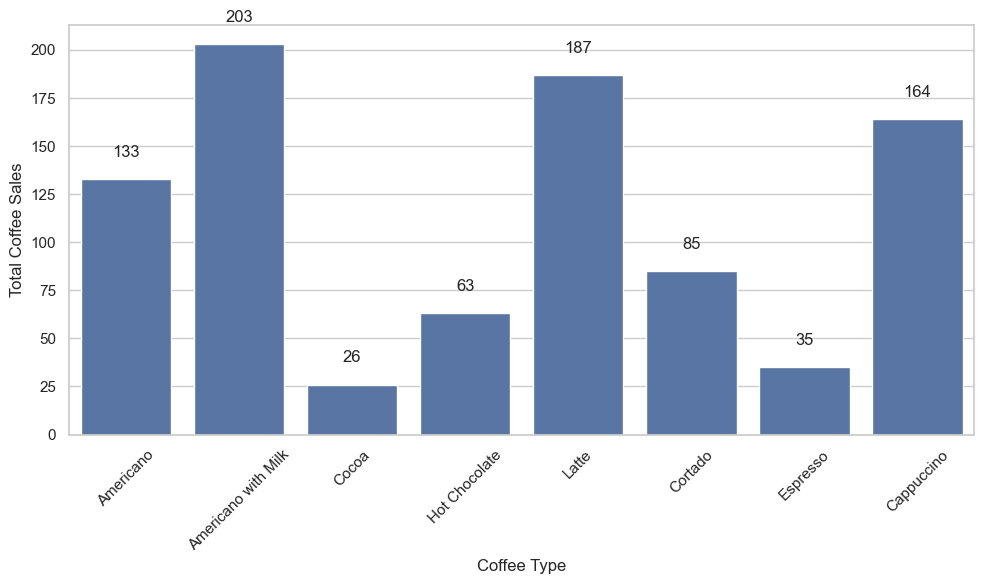

In [ ]:
# Visualize total coffes sales per coffee type
plt.figure(figsize=(10, 6))
sns.barplot(x='coffee_name', y='transaction_count', data=df, estimator=np.sum, errorbar=None)
for index, row in df.groupby('coffee_name')['transaction_count'].sum().items():
    plt.text(index, row + 10, f'{row}', ha='center', va='bottom')
plt.xlabel('Coffee Type')
plt.ylabel('Total Coffee Sales')
plt.xticks(rotation=45)
plt.tight_layout()

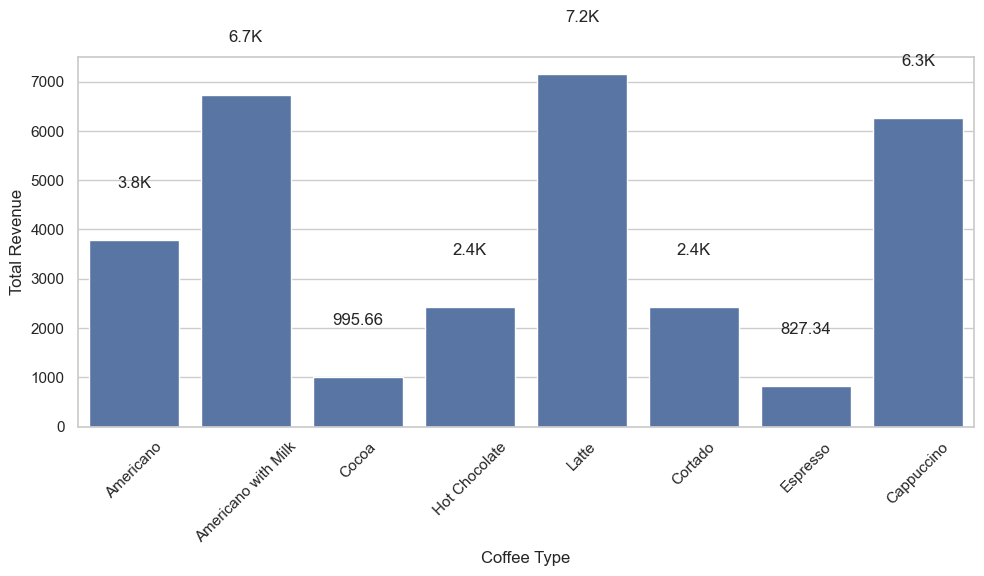

In [ ]:
# Visualize total coffee revenue per coffee type
def format_number(num):
    if num >= 1_000_000:
        return f'{num/1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num/1_000:.1f}K'
    else:
        return str(num)

plt.figure(figsize=(10, 6))
sns.barplot(x='coffee_name', y='total_revenue', data=df, estimator=np.sum, errorbar=None)
for index, row in df.groupby('coffee_name')['total_revenue'].sum().items():
    plt.text(index, row + 1000, format_number(row), ha='center', va='bottom')
plt.xlabel('Coffee Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\Irfan\AppData\Local\Temp\ipykernel_3248\379999228.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='transaction_count', data=df, estimator=np.sum, ci=None)


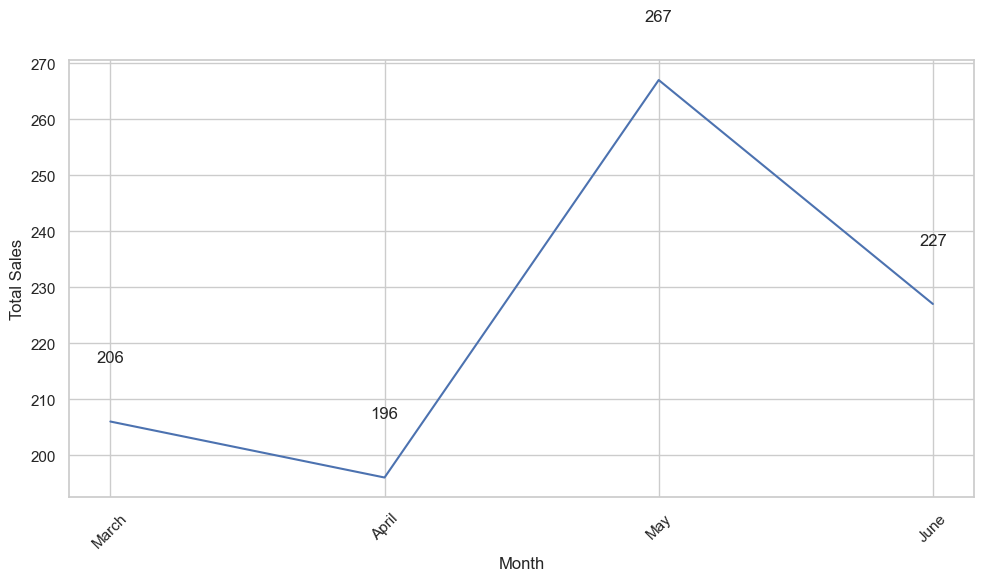

In [49]:
# Visualize total salses per month with line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='transaction_count', data=df, estimator=np.sum, ci=None)
for index, row in df.groupby('Month')['transaction_count'].sum().items():
    plt.text(index, row + 10, f'{row}', ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

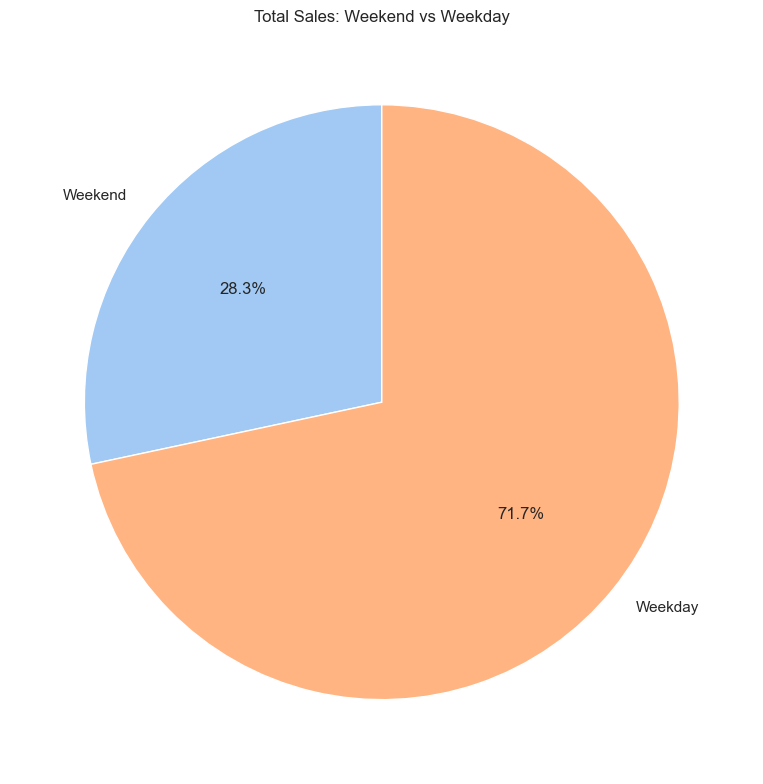

In [ ]:
# Compare total sales weekend vs weekday
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
weekend_sales = df[df['Day of the week'].isin(['Saturday', 'Sunday'])]['transaction_count'].sum()
weekday_sales = df[~df['Day of the week'].isin(['Saturday', 'Sunday'])]['transaction_count'].sum()
sales_data = pd.Series([weekend_sales, weekday_sales], index=['Weekend', 'Weekday'])
sales_data.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), figsize=(8, 8))
plt.title('Total Sales: Weekend vs Weekday')
plt.ylabel('')
plt.tight_layout()

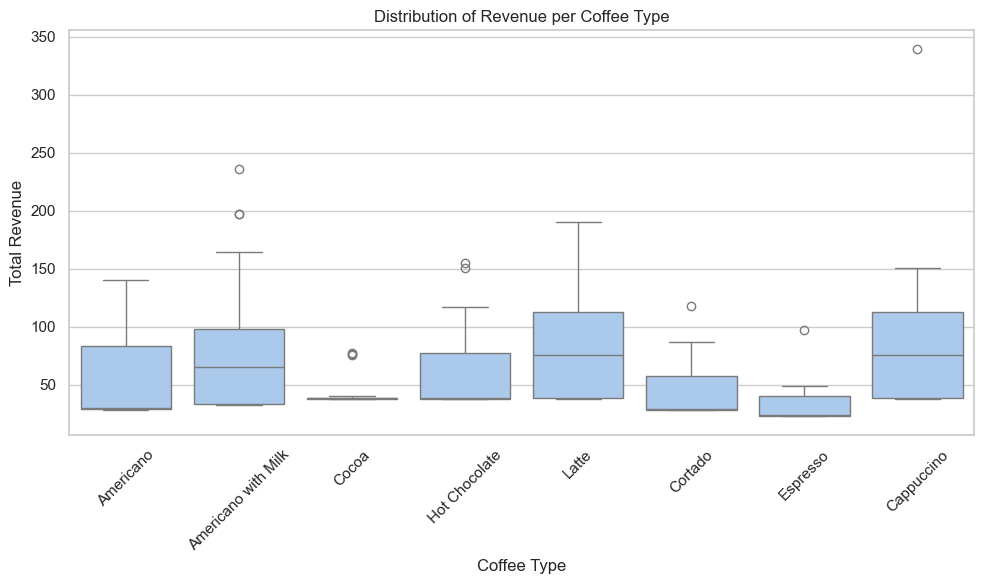

In [71]:
# Visualize Distribution reveneue per coffee type
plt.figure(figsize=(10, 6))
sns.boxplot(x='coffee_name', y='total_revenue', data=df)
plt.xlabel('Coffee Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.title('Distribution of Revenue per Coffee Type')
plt.tight_layout()


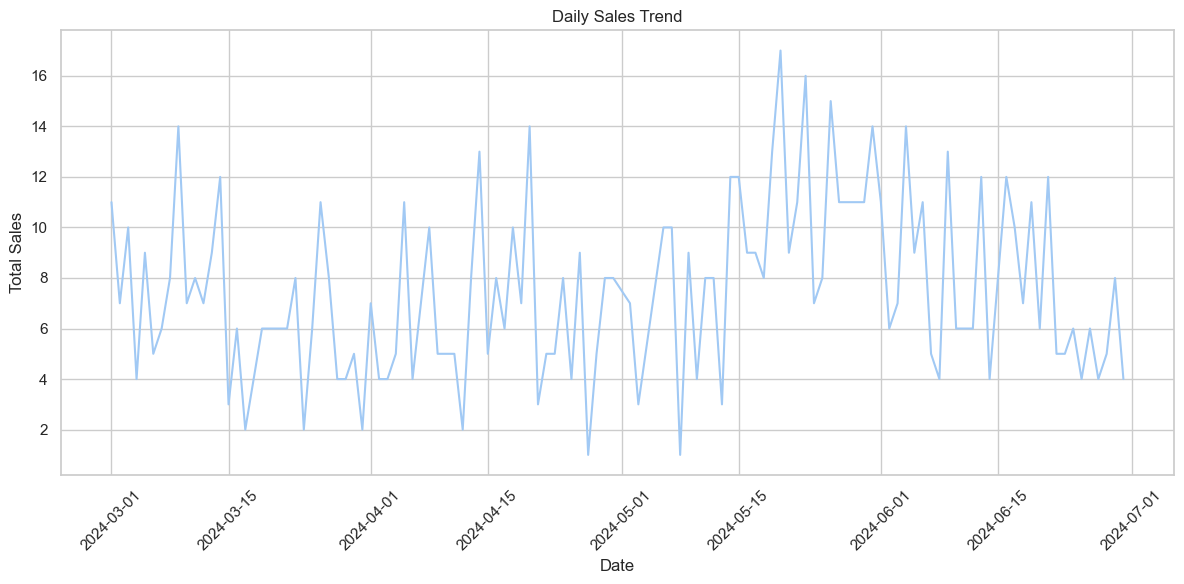

In [78]:
# Visualize Daily sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='transaction_count', data=df, estimator=np.sum, errorbar=None)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()